# ╔════════════════════════════════════════════╗
# ║ Sistema de Recomendação Sensorial de Cervejas │
# ╚════════════════════════════════════════════╝

Este notebook foi desenvolvido com o objetivo de criar um sistema de recomendação de estilos de cerveja com base nas características sensoriais, utilizando Machine Learning. O sistema utiliza a **distância euclidiana** e o método **TF-IDF** (Term Frequency-Inverse Document Frequency) para encontrar similaridades entre os estilos de cerveja, considerando atributos como:

- **ABV** (Teor alcoólico)
- **IBU** (Unidade Internacional de Amargor)
- **SRM** (Método de Referência Padrão para cor)
- **OG** (Densidade Original)
- **FG** (Densidade Final)

O projeto também integra dados do guia **BJCP** (Beer Judge Certification Program) como base para os estilos de cerveja.

O processo é dividido em três testes principais:
1. **Cálculo de similaridade utilizando a distância euclidiana**
2. **Cálculo de similaridade utilizando o TF-IDF**
3. **Intersecção dos resultados de ambos os testes para refinar as recomendações**


# Importações Necessárias

In [30]:
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# Função segura para converter valores em float


In [31]:
def safe_float(value):
    if isinstance(value, (int, float)):
        return float(value)
    if isinstance(value, str):
        value = value.strip().split()[0]  # pega só o número antes do texto
        value = value.replace(",", ".")
        try:
            return float(value)
        except ValueError:
            return 0.0
    return 0.0


# 1. Leitura do JSON e extração dos atributos

In [32]:
with open("bjcp.json", "r", encoding="utf-8") as f:
    dados = json.load(f)

estilos = []
for categoria in dados["styleguide"]["category"]:
    nome_categoria = categoria["name"]
    for sub in categoria["subcategory"]:
        stats = sub.get("statistics", {})
        estilo = {
            "id": sub["id"],
            "nome": sub["name"],
            "categoria": nome_categoria,
            "abv": (safe_float(stats.get("abv", {}).get("min", 0)) + safe_float(stats.get("abv", {}).get("max", 0))) / 2,
            "ibu": (safe_float(stats.get("ibus", {}).get("min", 0)) + safe_float(stats.get("ibus", {}).get("max", 0))) / 2,
            "srm": (safe_float(stats.get("srm", {}).get("min", 0)) + safe_float(stats.get("srm", {}).get("max", 0))) / 2,
            "og":  (safe_float(stats.get("og", {}).get("min", 0)) + safe_float(stats.get("og", {}).get("max", 0))) / 2,
            "fg":  (safe_float(stats.get("fg", {}).get("min", 0)) + safe_float(stats.get("fg", {}).get("max", 0))) / 2,
        }
        estilos.append(estilo)

# Converter os estilos para um DataFrame
df = pd.DataFrame(estilos)

# 2. Correção de colunas de médias e cálculo das distâncias de intervalo

In [33]:
df["abv_avg"] = df["abv"]
df["ibu_avg"] = df["ibu"]
df["srm_avg"] = df["srm"]
df["og_avg"]  = df["og"]
df["fg_avg"]  = df["fg"]

df["abv_range"] = df["abv"]  # Sem 'min' e 'max', já que estamos com valores médios
df["ibu_range"] = df["ibu"]
df["srm_range"] = df["srm"]
df["og_range"]  = df["og"]
df["fg_range"]  = df["fg"]

# Definir as características para a análise PCA
features = ["abv_avg", "ibu_avg", "srm_avg", "og_avg", "fg_avg",
            "abv_range", "ibu_range", "srm_range", "og_range", "fg_range"]

X = df[features].copy()




# 3. Normalização dos dados

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. PCA (Principal Component Analysis) para redução de dimensionalidade

In [35]:
pca = PCA(n_components=2)  # Vamos reduzir para 2 componentes principais
X_pca = pca.fit_transform(X_scaled)

# Adicionar os componentes principais ao DataFrame para visualização
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


# 5. Visualizar os resultados da PCA

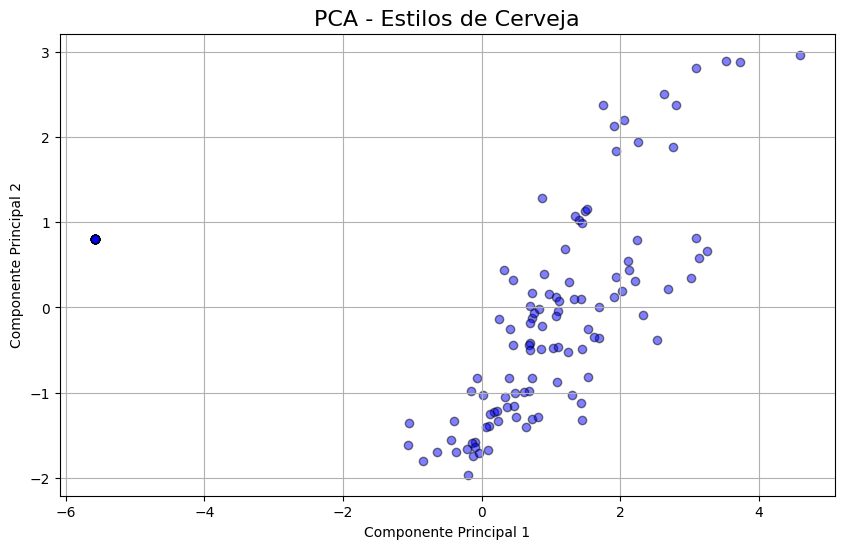

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df["PCA1"], df["PCA2"], c='blue', edgecolors='k', alpha=0.5)
plt.title("PCA - Estilos de Cerveja", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()
